In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/USER/Desktop/Education/College/2 - 1/Python Project/bank-nifty-1m-data.csv')

In [11]:
df.tail()

,Instrument,Date,Time,Open,High,Low,Close
851387,Banknifty,22-03-2024,14:36:00,46876.55,46885.10,46874.60,46883.60
851388,Banknifty,22-03-2024,14:37:00,46883.45,46895.95,46879.25,46885.40
851389,Banknifty,22-03-2024,14:38:00,46886.65,46889.95,46867.45,46889.95
851390,Banknifty,22-03-2024,14:39:00,46888.95,46894.05,46869.85,46871.55
851391,Banknifty,22-03-2024,14:40:00,46875.55,46885.35,46871.45,46880.85


In [12]:
df = df.head(10000)

In [13]:
df = df.drop(['Date','Instrument'], axis = 1)
df.head()

,Time,Open,High,Low,Close
0,09:15:00,18845.9,18845.90,18801.70,18801.70
1,09:16:00,18801.7,18806.05,18790.20,18794.65
2,09:17:00,18796.0,18829.00,18794.65,18827.30
3,09:18:00,18827.3,18864.00,18827.30,18862.10
4,09:19:00,18862.1,18862.10,18843.55,18849.25


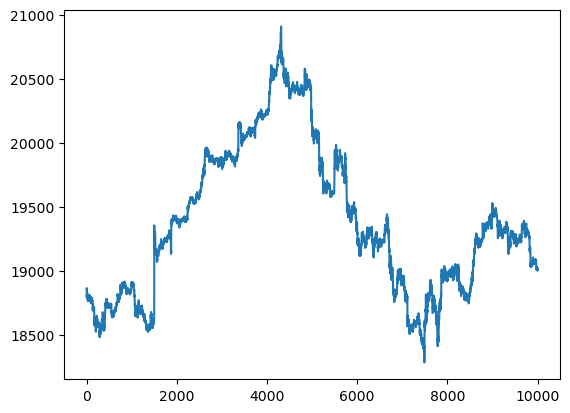

In [14]:
plt.plot(df.Close)

In [15]:
ma10 = df.Close.rolling(5).mean()
ma10

0            NaN
1            NaN
2            NaN
3            NaN
4       18827.00
          ...   
9995    19012.71
9996    19010.60
9997    19010.05
9998    19009.81
9999    19007.13
Name: Close, Length: 10000, dtype: float64

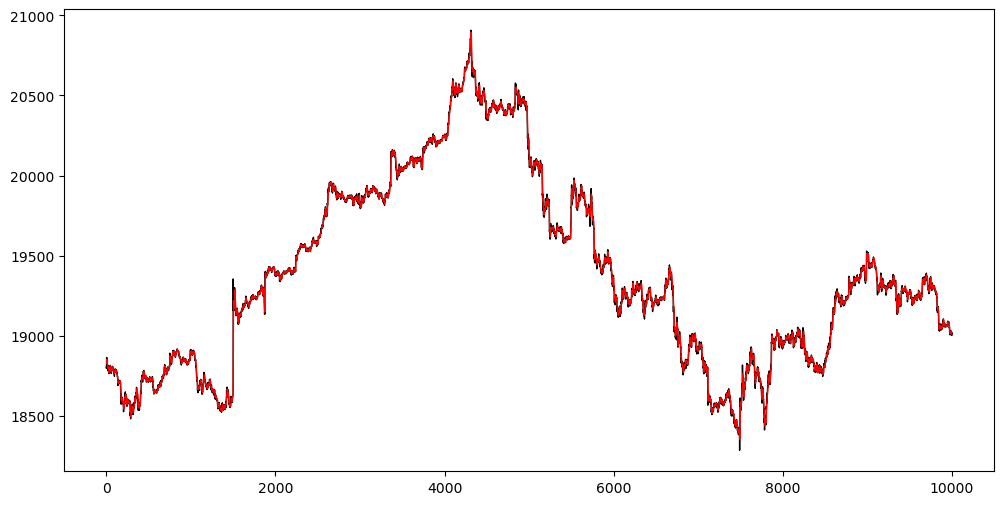

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close, 'black',linewidth = 1)
plt.plot(ma10, 'red', linewidth = 1)

In [17]:
df.shape

(10000, 5)

In [18]:
#splitting into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(7000, 1)
(3000, 1)


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.1326455 ],
       [0.12974175],
       [0.14318959],
       ...,
       [0.17327732],
       [0.17356563],
       [0.16763458]])

In [20]:
x_train = []
y_train = []

for i in range(200, data_training_array.shape[0]):
    x_train.append(data_training_array[i-200: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(6800, 200, 1)

In [22]:
#Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
#Dropout
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
#Dropout
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
#Dropout
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
#Dropout
model.add(Dropout(0.5))


#To connect Layers
model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 200, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 200, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 200, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 200, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 200, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 200, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 115s 442ms/step - loss: 0.0572
Epoch 2/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 93s 434ms/step - loss: 0.0068
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 94s 440ms/step - loss: 0.0054
Epoch 4/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 87s 406ms/step - loss: 0.0053
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 68s 318ms/step - loss: 0.0038
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 71s 331ms/step - loss: 0.0036
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 79s 372ms/step - loss: 0.0034
Epoch 8/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 85s 400ms/step - loss: 0.0029
Epoch 9/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 82s 385ms/step - loss: 0.0027
Epoch 10/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 80s 378ms/step - loss: 0.0027
Epoch 11/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 78s 366ms/step - loss: 0.0024
Epoch 12/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 74s 348ms/step - loss: 0.0021
Epoch 13/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 75s 352ms/step - loss: 0.0022
Epoch 14/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 78s 367ms/step - loss: 0.0019
Epoch 15/50
21

In [25]:
model.save('LSTMBank1.keras')

In [26]:
# Prepare the testing data
past_200_days = data_training.tail(200)
final_df = pd.concat([past_200_days, data_testing], ignore_index=True)
input_data = scaler.transform(final_df.values.reshape(-1, 1))

x_test = []
y_test = []

for i in range(200, input_data.shape[0]):
    x_test.append(input_data[i-200:i, 0])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 167ms/step


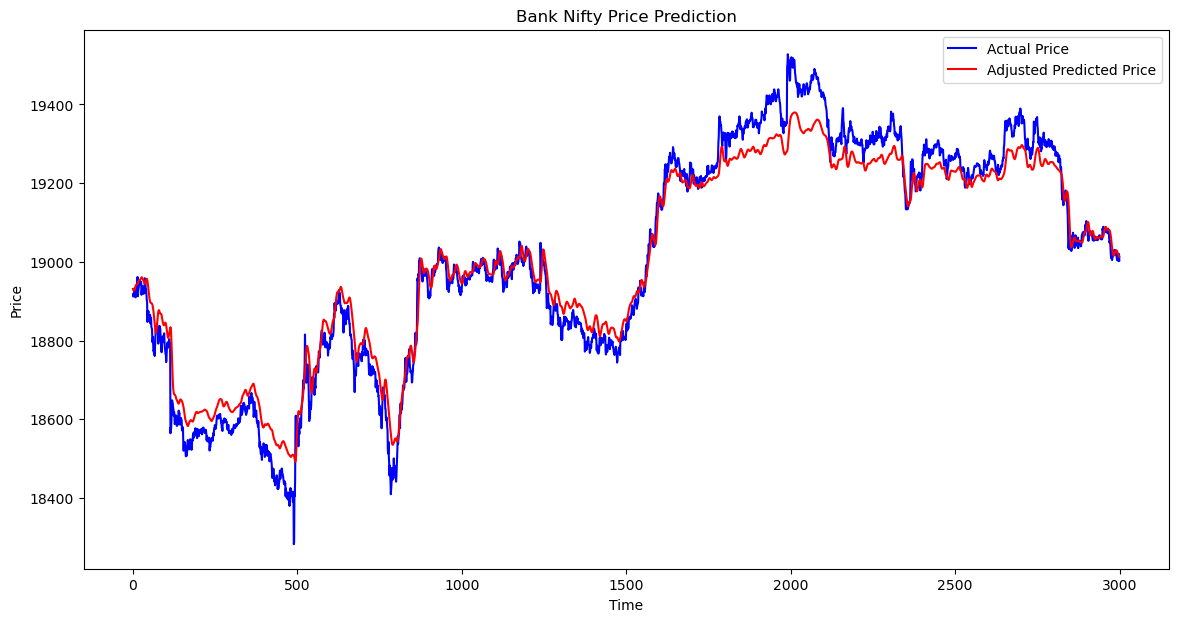

In [40]:
# Define a scaling factor
scaling_factor = 200

# Adjust the predictions
adjusted_predictions = predictions - scaling_factor

# Plot the actual vs. adjusted predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(adjusted_predictions, color='red', label='Adjusted Predicted Price')
plt.title('Bank Nifty Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [36]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate accuracy
accuracy = 100 - mape
print(f"Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 1.05%
Accuracy: 98.95%


In [43]:
# Convert predictions to binary labels
predicted_labels = (predictions[1:] > predictions[:-1]).astype(int)
true_labels = (y_test[1:] > y_test[:-1]).astype(int)

In [44]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)

In [45]:
from sklearn.metrics import f1_score

f1 = f1_score(true_labels, predicted_labels)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.49
